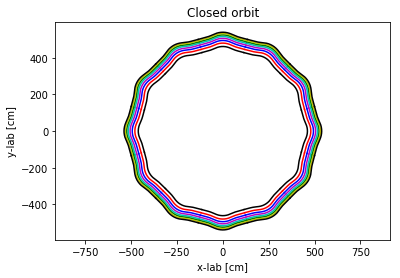

In [26]:
%matplotlib inline
import numpy as np
import pylab as plt
import sys
import os

#Use numpy loadtxt to read the columns directly.
#y,t,z,p are the radial coordinate and angle and the vertical coordinate and angle, respectively.
FL=os.getcwd()

file_list = ['co'+str(n)+'.plt' for n in range(8)]
#file_list = ['zgoubi_singlepass.plt']

#Coordinate transform function
def rotate(cart_x0, cart_y0, rotation, origin = [0,0]):
	ox = origin[0]
	oy = origin[1]
	cart_x = ox + (cart_x0 - ox)*np.cos(rotation) - (cart_y0 - oy)*np.sin(rotation)
	cart_y = oy + (cart_x0-ox)*np.sin(rotation) + (cart_y0-oy)*np.cos(rotation) 

	return cart_x, cart_y

nc = 12
cell_angle = 2*np.pi/nc
xoff = 0.5*cell_angle

col_l = ['k','r','b','m','c','g','y']
i_f = 0
for file1 in file_list:
    
    y, t, s, x, bz = np.loadtxt('%s/%s'%(FL,file1),skiprows=2,usecols=(9,10,13,21,24),unpack=True)
    
    xlab = y*np.cos(x-xoff)
    ylab = y*np.sin(x-xoff)
    
    for ic in range(nc):
        xc_lab, yc_lab = rotate(xlab, ylab, ic*cell_angle)
        plt.plot(yc_lab,xc_lab, col_l[i_f%len(col_l)]+'-')
    
    i_f = i_f + 1
    
plt.xlabel('x-lab [cm]')
plt.ylabel('y-lab [cm]')
plt.title('Closed orbit')
plt.axis('equal')
plt.show()